# Funciones de distribucion de probabilidades

## Dsitribucion uniforme

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a=5
b=100
n=1000000
data=np.random.uniform(a,b,n)


(array([ 99507.,  99925., 100524.,  99917., 100395., 100407.,  99315.,
        100281.,  99768.,  99961.]),
 array([ 5.00010644, 14.50008449, 24.00006254, 33.50004059, 43.00001864,
        52.49999669, 61.99997474, 71.49995279, 80.99993084, 90.4999089 ,
        99.99988695]),
 <a list of 10 Patch objects>)

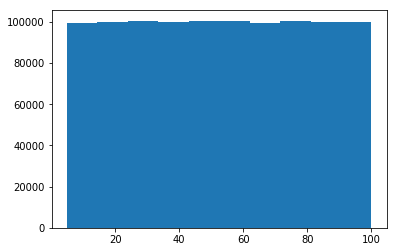

In [3]:
%matplotlib inline

plt.hist(data)

# distribucion normal

In [4]:
data=np.random.randn(1000000)

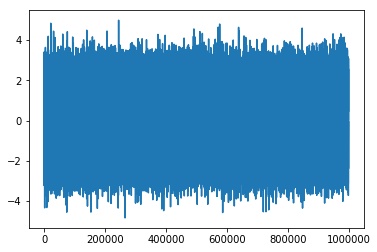

In [5]:
x=range(1,1000001)
plt.plot(x,data)

(array([5.60000e+01, 2.08100e+03, 2.75150e+04, 1.52432e+05, 3.46036e+05,
        3.25577e+05, 1.25180e+05, 1.98240e+04, 1.25400e+03, 4.50000e+01]),
 array([-4.83163863, -3.85121747, -2.87079632, -1.89037516, -0.90995401,
         0.07046714,  1.0508883 ,  2.03130945,  3.0117306 ,  3.99215176,
         4.97257291]),
 <a list of 10 Patch objects>)

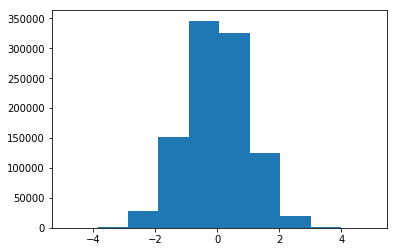

In [6]:
plt.hist(data)

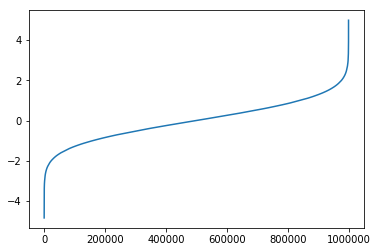

In [7]:
plt.plot(x,sorted(data))

(array([  12.,   78.,  443., 1363., 2641., 2914., 1781.,  633.,  122.,
          13.]),
 array([-4.27527635, -2.36944686, -0.46361737,  1.44221211,  3.3480416 ,
         5.25387109,  7.15970057,  9.06553006, 10.97135955, 12.87718903,
        14.78301852]),
 <a list of 10 Patch objects>)

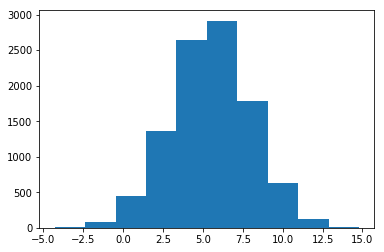

In [8]:
mu=5.5#media
sd=2.5#desviacion estandar
z_10000=np.random.randn(10000)
data= mu+sd*z_10000#teorema central del limite-> z=(X-mu)/sd->N(0,1), X=mu+sd*Z
plt.hist(data)

In [9]:
data=np.random.randn(2,4)
data

array([[-0.40235558, -0.44805587,  0.34910391, -0.59543513],
       [-1.1264187 , -0.41935306,  1.37177615, -0.09868265]])

# La simulación de Montecarlo

*generamos dos num aleatorios uniformes(que tengan la misma prob.) entre 0y1
*calcularemos x*x + y*y
    #si el valor es inferior a 1->estamos dentro del circulo
    #si el valor es mayor a 1->estamos afuera del circulo
*calculamos el numero total de veces q estan dentro del circulo y lo dividimos entre el num total de intento para obtener un apro.de la probabilidad de caer dentro del circulo.

*usamos dicha probabiidad para aproximar el valor de pi.
*Calculamos el promedio de los 100 experimentos anteriores para dar un valor final a pi.

In [10]:
def pi_montecarlo(n,n_exp):
    pi_avg=0
    pi_value_list=[]
    
    for i in range(n_exp):
        value=0
        x=np.random.uniform(0,1,n).tolist()
        y=np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z= np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z<=1:
                value +=1
        float_value=float(value)
        pi_value=float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg +=pi_value

    pi=pi_avg/n_exp

    print(pi)
    fig=plt.plot(pi_value_list)
    return(pi,fig)

3.1443000000000025


(3.1443000000000025, [<matplotlib.lines.Line2D at 0x287dc789438>])

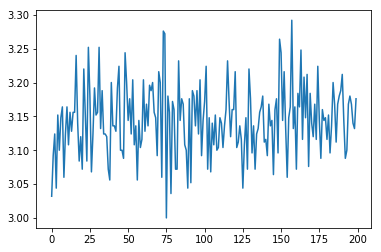

In [11]:
pi_montecarlo(1000,200)


# Dummy Data Sets

In [19]:
n=1000000;
data=pd.DataFrame(
    {
        'A':np.random.randn(n),
        'B':1.5+2.5*np.random.randn(n),
        'C':np.random.uniform(5,32,n),
    }
)

In [20]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001118,1.501841,18.496056
std,1.000002,2.499828,7.798428
min,-4.970861,-10.430482,5.000030
25%,-0.673527,-0.184853,11.733158
50%,0.002908,1.503200,18.490746
75%,0.675415,3.187987,25.253422
max,4.635301,13.782605,31.999948


(array([3.40000e+01, 1.12600e+03, 1.71210e+04, 1.11177e+05, 3.02723e+05,
        3.53524e+05, 1.74702e+05, 3.62430e+04, 3.23600e+03, 1.14000e+02]),
 array([-4.97086124, -4.01024506, -3.04962887, -2.08901268, -1.1283965 ,
        -0.16778031,  0.79283587,  1.75345206,  2.71406825,  3.67468443,
         4.63530062]),
 <a list of 10 Patch objects>)

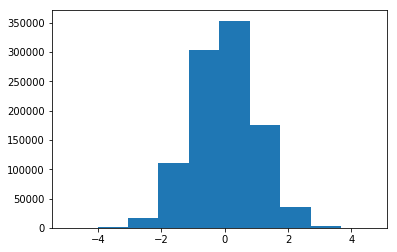

In [21]:
plt.hist(data["A"])

(array([6.90000e+01, 2.21900e+03, 2.86360e+04, 1.53677e+05, 3.43119e+05,
        3.22585e+05, 1.27234e+05, 2.10480e+04, 1.37000e+03, 4.30000e+01]),
 array([-10.43048178,  -8.00917315,  -5.58786451,  -3.16655588,
         -0.74524724,   1.67606139,   4.09737003,   6.51867866,
          8.9399873 ,  11.36129593,  13.78260456]),
 <a list of 10 Patch objects>)

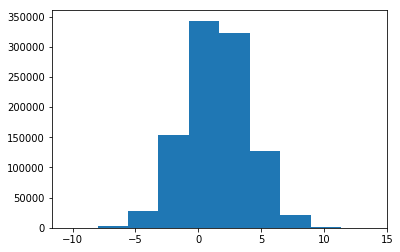

In [22]:
plt.hist(data["B"])

(array([100050., 100343.,  99894., 100193.,  99908.,  99675.,  99646.,
        100420.,  99608., 100263.]),
 array([ 5.00002978,  7.70002162, 10.40001345, 13.10000528, 15.79999712,
        18.49998895, 21.19998079, 23.89997262, 26.59996445, 29.29995629,
        31.99994812]),
 <a list of 10 Patch objects>)

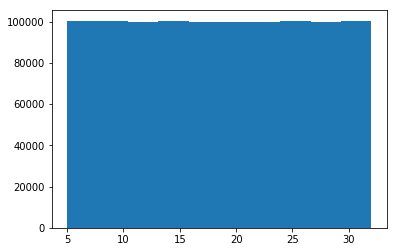

In [23]:
plt.hist(data["C"])

In [24]:
data=pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [25]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [28]:
column_names=data.columns.values.tolist()
a=len(column_names)
a

21

In [32]:
new_data=pd.DataFrame(
    {
        'Column Name': column_names,
        'A':np.random.randn(a),
        'B':np.random.uniform(0,1,a)
    },index=range(42,42+a)

)

In [33]:
new_data

,Column Name,A,B
42,State,1.271659,0.944070
43,Account Length,0.933362,0.045133
44,Area Code,-0.442113,0.656513
45,Phone,1.018683,0.913635
46,Int'l Plan,1.397184,0.250821
47,VMail Plan,-0.339961,0.070463
48,VMail Message,0.159011,0.574594
49,Day Mins,0.553434,0.803431
50,Day Calls,1.539107,0.374225
51,Day Charge,-0.605025,0.555701
